In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
df["math score"].astype("int64")

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

<AxesSubplot:>

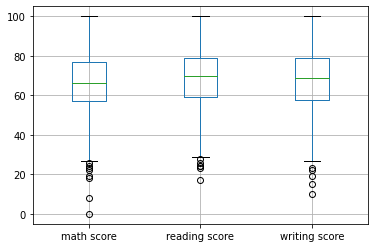

In [12]:
columns=["math score","reading score","writing score"]
df.boxplot(columns)

In [39]:
np.count_nonzero(df["math score"]>99)

7

In [38]:
np.where(df["math score"]>99)

(array([149, 451, 458, 623, 625, 916, 962], dtype=int64),)

In [40]:
#np.where((df['placement_score'] > 85) & (df['placement_offer_count'] < 3))

Outlier Detection

In [45]:
df[(df["math score"]>90) | (df["reading score"]>90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
34,male,group E,some college,standard,none,97,87,82
102,female,group D,associate's degree,standard,none,85,91,89
104,male,group C,some college,standard,completed,98,86,90
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94


In [46]:
#outlier  removal

In [52]:
 new_df1 = df[
((df["math score"] >= 60) & (df["math score"] <= 80)) &
((df["reading score"] >= 75) & (df["reading score"] <= 95)) &
((df["writing score"] >= 60) & (df["writing score"] <= 80))]


In [53]:
new_df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
12,female,group B,high school,standard,none,65,81,73
15,female,group C,some high school,standard,none,69,75,78
21,female,group B,some college,free/reduced,completed,65,75,70
...,...,...,...,...,...,...,...,...
968,female,group E,associate's degree,standard,none,68,76,67
969,female,group B,bachelor's degree,standard,none,75,84,80
975,female,group C,some college,standard,completed,64,82,77
991,female,group B,some high school,standard,completed,65,82,78


In [56]:
new_df1[(new_df1['math score'] < 60) | (new_df1['math score'] > 80)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [59]:
from sklearn.preprocessing import MinMaxScaler 
scaling = MinMaxScaler()
scaling.fit_transform(new_df1[['math score','reading score','writing score']])

array([[0.8       , 0.27272727, 0.6875    ],
       [0.55      , 0.72727273, 0.875     ],
       [0.25      , 0.54545455, 0.5625    ],
       [0.45      , 0.        , 0.875     ],
       [0.25      , 0.        , 0.375     ],
       [0.45      , 0.45454545, 0.4375    ],
       [0.55      , 0.36363636, 0.4375    ],
       [0.9       , 0.63636364, 0.9375    ],
       [0.25      , 0.18181818, 0.625     ],
       [0.7       , 0.36363636, 0.6875    ],
       [0.4       , 0.72727273, 0.875     ],
       [0.35      , 0.        , 0.375     ],
       [0.55      , 0.18181818, 0.8125    ],
       [1.        , 0.09090909, 0.0625    ],
       [0.8       , 0.72727273, 0.9375    ],
       [0.9       , 0.36363636, 0.75      ],
       [0.25      , 0.54545455, 0.8125    ],
       [0.45      , 0.18181818, 0.3125    ],
       [0.7       , 0.54545455, 0.75      ],
       [1.        , 0.36363636, 0.9375    ],
       [0.3       , 0.18181818, 0.375     ],
       [1.        , 0.        , 0.8125    ],
       [1.